# Plot for figure 3

In [2]:
import numpy as np
import scipy as sp
from scipy.sparse import csr_matrix
import scanpy as sc
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import colors
import seaborn as sb
import palantir

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [3]:
#### need to add this line to restore plotting function of scanpy in the presence of palantir
%matplotlib inline

In [4]:
import milopy
import milopy.core as milo
import milopy.plot as milopl

In [5]:
ct_order = ['DP(P)_T','DP(Q)_T','ABT(ENTRY)','CD8+T','CD4+T']
ct_color_map = dict(zip(ct_order, np.array(sb.color_palette('colorblind'))[range(len(ct_order))]))

In [6]:
# set working directory
%cd /lustre/scratch117/cellgen/team205/cs42/VDJ_collab_manuscript/

/lustre/scratch117/cellgen/team205/cs42/VDJ_collab_manuscript


In [7]:
# figure directory
fig_path = '/home/jovyan/mount/gdrive/VDJ_collab/plots_output/chenqu_jhub/'
sc.settings.figdir = fig_path

In [8]:
sc.settings.set_figure_params(dpi = 160, color_map = 'RdYlBu_r', dpi_save = 300, format = 'pdf')
plt.rcParams["figure.figsize"] = [6,6]
sb.set_palette('colorblind')

In [9]:
# import utils (in github folder dandelion/tools/)
import sys
sys.path.append('/lustre/scratch117/cellgen/team205/cs42/VDJ_collab_manuscript/utils')
from _trajectory import *

# Load data

In [10]:
bdata = sc.read('write/DP_cell_adata.h5ad')
nhood_adata = sc.read('write/DP_nhood_adata.h5ad')

# Plot

Synthetic cell umap

In [86]:
import random
subsample = random.sample(list(bdata.obs_names), int(bdata.shape[0]/10))

In [87]:
new = bdata[subsample]
sc.pp.neighbors(new, use_rep = "X_scvi", n_neighbors = 40)

In [88]:
sc.tl.umap(new, random_state = 1712)

In [89]:
milo.make_nhoods(new)

In [92]:
new.obs['nhood'] = np.nan
new.obs.loc[new.obs_names[np.array(new.obsm['nhoods'].todense()[:,0],dtype='bool').flatten()],'nhood'] = '1'
new.obs.loc[new.obs_names[np.array(new.obsm['nhoods'].todense()[:,50],dtype='bool').flatten()],'nhood'] = '2'

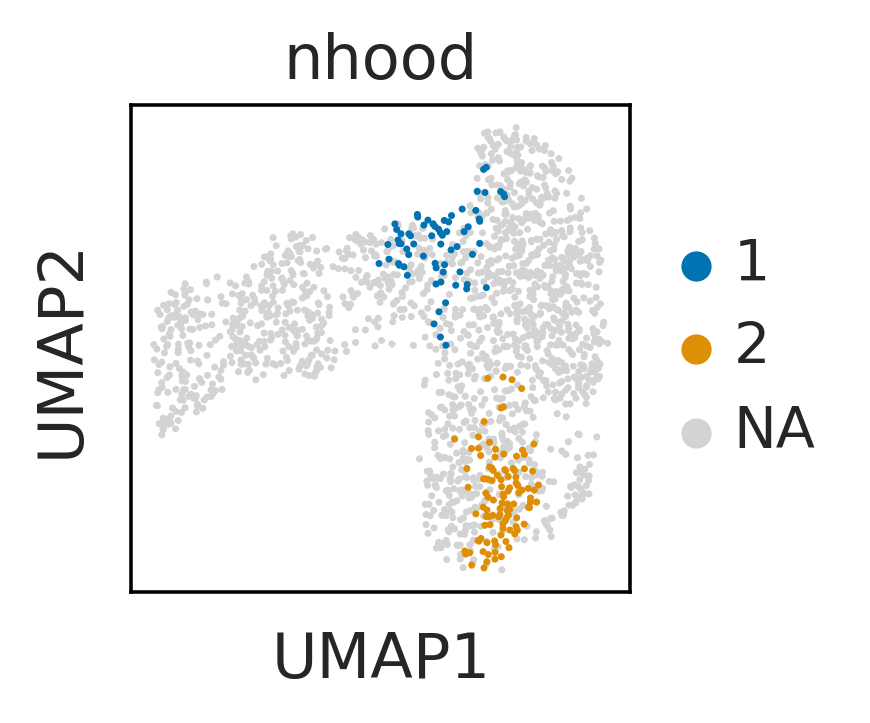

In [93]:
plt.rcParams["figure.figsize"] = [2,2]
sc.pl.umap(new, color=['nhood'], save='synthetic_cell_umap.pdf',size=10)

Synthetic nhood pca

In [100]:
nhood_subsample = random.sample(list(nhood_adata.obs_names), int(nhood_adata.shape[0]/8))

In [157]:
new_nhood = nhood_adata[nhood_subsample]

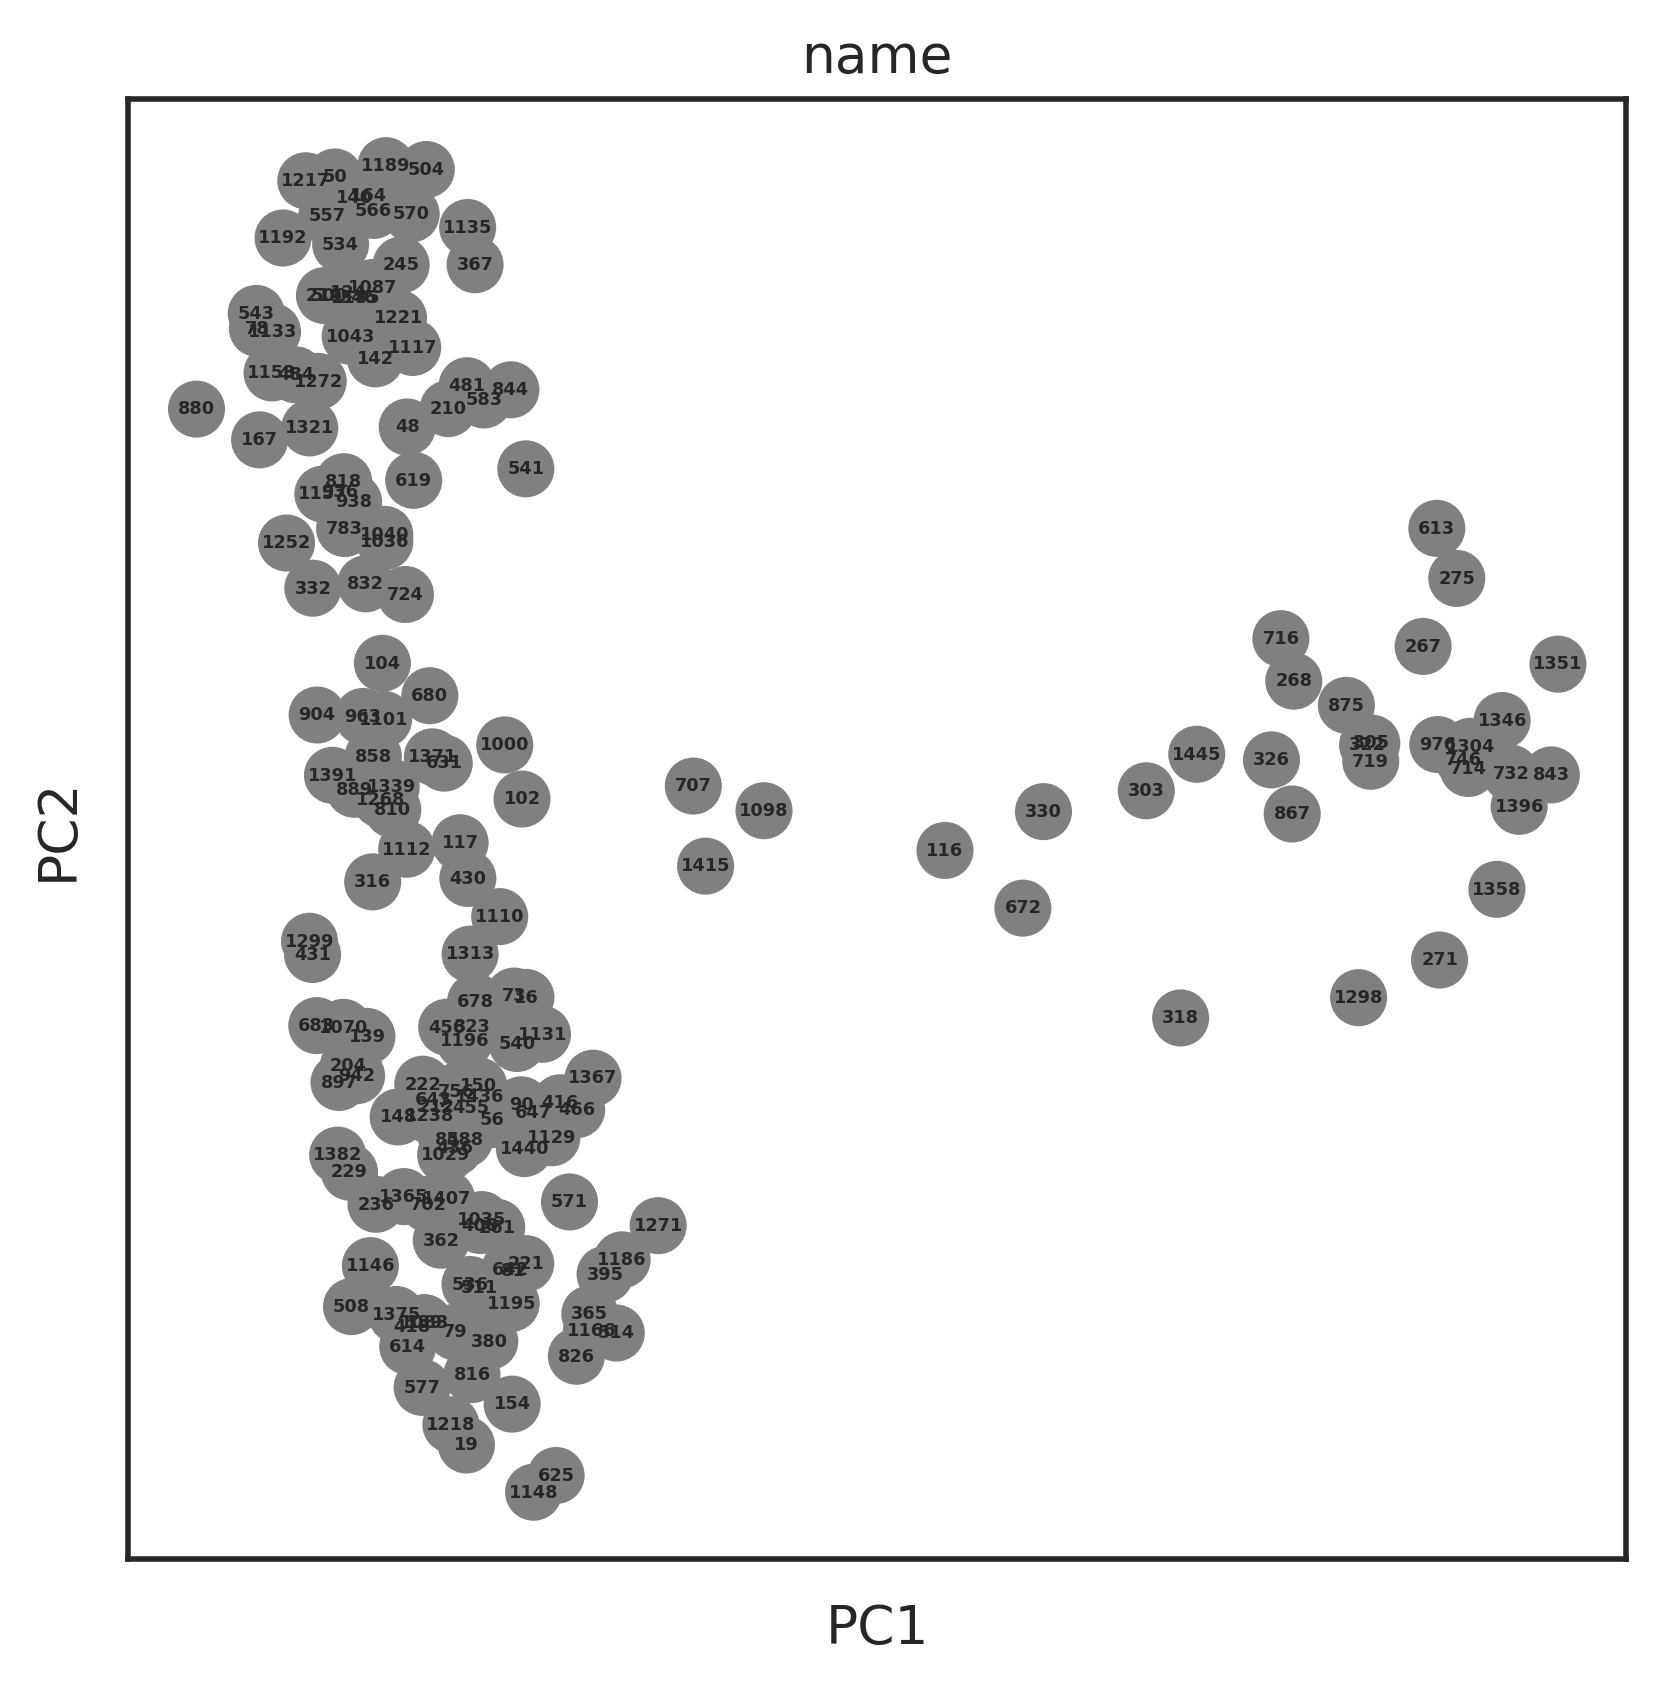

In [201]:
new_nhood.obs['name'] = new_nhood.obs_names
new_nhood.obs['name'] = new_nhood.obs['name'].astype('category')
plt.rcParams["figure.figsize"] = [6,6]
sc.pl.pca(new_nhood, color=['name'],legend_loc='on data',legend_fontsize=4)

In [158]:
PCA = new_nhood.obsm['X_pca'][:,range(2)]

In [197]:
new_nhood.obs['color'] = '2'
new_nhood.obs.loc['116','color'] = '0'
new_nhood.obs.loc['275','color'] = '1'

In [198]:
new_nhood.obs['color'] = new_nhood.obs['color'].astype('category')

In [199]:
ct_order = ['0','1','2']
ct_color_map = dict(zip(ct_order, np.array(sb.color_palette('colorblind'))[[0,1,7]]))

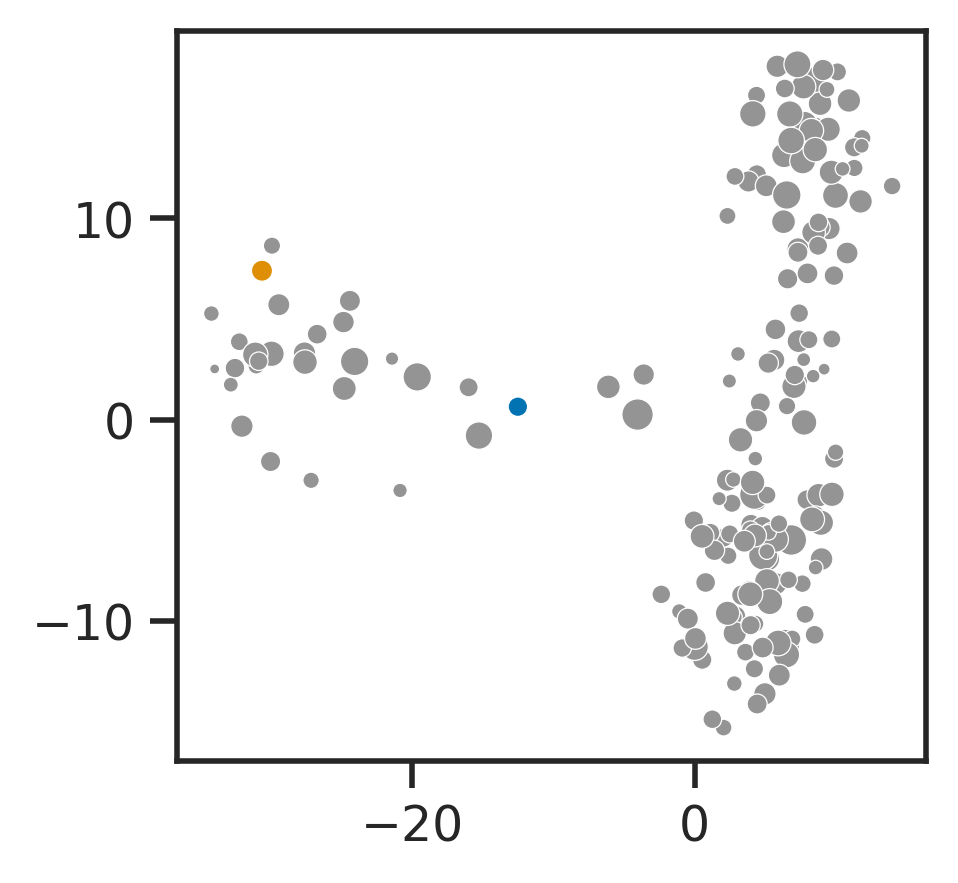

In [203]:
sb.set_theme(style='ticks')
fig, ax = plt.subplots(figsize=(3,3))
sb.scatterplot(x=-PCA[:,0],y=PCA[:,1], size = new_nhood.obs['Nhood_size'],hue=new_nhood.obs['color'], palette=ct_color_map, legend=False, sizes=(5,50))
plt.savefig(fig_path+'synthetic_nhood.pdf')